## Check CUDA version

In [1]:
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


## Install specific version of CUDA

In [2]:
%cd /usr/local/
!tar -xzvf "/content/drive/My Drive/YOLOv4/cudnn-10.1-linux-x64-v7.6.5.32 (1).tgz"

!chmod a+r /usr/local/cuda/include/cudnn.h
!cat /usr/local/cuda/include/cudnn.h | grep CUDNN_MAJOR -A 2

%cd /content/

/usr/local
tar (child): /content/drive/My Drive/YOLOv4/cudnn-10.1-linux-x64-v7.6.5.32 (1).tgz: Cannot open: No such file or directory
tar (child): Error is not recoverable: exiting now
tar: Child returned status 2
tar: Error is not recoverable: exiting now
chmod: cannot access '/usr/local/cuda/include/cudnn.h': No such file or directory
cat: /usr/local/cuda/include/cudnn.h: No such file or directory
/content


## Check OpenCV version

In [3]:
import cv2
cv2.__version__

'4.1.2'

## Check GPU version

In [4]:
!nvidia-smi

Mon Jun 13 19:58:05 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Final check for CUDA version

In [5]:
!nvcc -V

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


## Kaggle API connect, Dataset download and unzip

In [6]:
! pip install kaggle
! mkdir ~/.kaggle #
# ! cp /content/drive/MyDrive/AIML_Research_Projects_&_Publication/4_Leukemia_March_2022/Codes/kaggle.json
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

# Download Dataset
! kaggle datasets download mehradaria/leukemia

# Unzip
! unzip leukemia.zip

Streaming output truncated to the last 5000 lines.
  inflating: Original/Pre/WBC-Malignant-Pre-024.jpg  
  inflating: Original/Pre/WBC-Malignant-Pre-025.jpg  
  inflating: Original/Pre/WBC-Malignant-Pre-026.jpg  
  inflating: Original/Pre/WBC-Malignant-Pre-027.jpg  
  inflating: Original/Pre/WBC-Malignant-Pre-028.jpg  
  inflating: Original/Pre/WBC-Malignant-Pre-029.jpg  
  inflating: Original/Pre/WBC-Malignant-Pre-030.jpg  
  inflating: Original/Pre/WBC-Malignant-Pre-031.jpg  
  inflating: Original/Pre/WBC-Malignant-Pre-032.jpg  
  inflating: Original/Pre/WBC-Malignant-Pre-033.jpg  
  inflating: Original/Pre/WBC-Malignant-Pre-034.jpg  
  inflating: Original/Pre/WBC-Malignant-Pre-035.jpg  
  inflating: Original/Pre/WBC-Malignant-Pre-036.jpg  
  inflating: Original/Pre/WBC-Malignant-Pre-037.jpg  
  inflating: Original/Pre/WBC-Malignant-Pre-038.jpg  
  inflating: Original/Pre/WBC-Malignant-Pre-039.jpg  
  inflating: Original/Pre/WBC-Malignant-Pre-040.jpg  
  inflating: Original/Pre/WBC-M

## Initial Dependencies

In [7]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import os #file operation
import math
import shutil #Move files one directory to others
import glob

In [8]:
# Count the number of images in the respective classes
def ClassFreq(ROOT_DIR):
  # ROOT_DIR = ""
  number_of_images = {}

  # os.listdir() returns the elements on the specific folder
  for dir in os.listdir(ROOT_DIR):
    number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

  # List of images according to the subdirectory
  # number_of_images.items()

  # Count class   #add len() in above loop
  print(number_of_images.items())

ClassFreq("/content/Original")

dict_items([('Benign', 504), ('Pre', 963), ('Early', 985), ('Pro', 804)])


In [9]:
os.listdir("/content/Original")

['Benign', 'Pre', 'Early', 'Pro']

## Dataset Splitting

#### Training: 70%, Validation: 15%, Testing: 15%

In [10]:
# shutil.rmtree("/content/train") 
# shutil.rmtree("/content/test")
# shutil.rmtree("/content/val")

In [11]:
ROOT_DIR = "/content/Original"
number_of_images = {}
# os.listdir() returns the elements on the specific folder
for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))
print(number_of_images.items())


dict_items([('Benign', 504), ('Pre', 963), ('Early', 985), ('Pro', 804)])


In [12]:
# number_of_images.items(1)

In [13]:

# Creates directory for train, test and validation set
def dataFolder(path, split):
  # Create separate folders for Training, Validation and Testing
  if not os.path.exists("./"+path): # When <path> directory is not available in the root directory
    os.mkdir("./"+path)             # make directory

    for dir in os.listdir(ROOT_DIR): #For the classes in the Root directory
      os.makedirs("./"+path+"/"+dir)      # create new directoris
      
      for img in np.random.choice(a = os.listdir(os.path.join(ROOT_DIR, dir)), size = (math.floor(split*number_of_images[dir])-5), replace = False):
        O = os.path.join(ROOT_DIR, dir, img)
        D = os.path.join("./"+path, dir)
        shutil.copy(O,D)
        os.remove(O)
        
  else:
    print(f"{path} directory already exists")

  print(f"{path} directory has been created")


#Split Dataset and create directory
dataFolder("train",0.7)
dataFolder("val",0.15)
dataFolder("test",0.15)


#Show data frequency
ClassFreq("/content/train")
ClassFreq("/content/val")
ClassFreq("/content/test")


train directory has been created
val directory has been created
test directory has been created
dict_items([('Benign', 347), ('Pre', 669), ('Early', 684), ('Pro', 557)])
dict_items([('Benign', 70), ('Pre', 139), ('Early', 142), ('Pro', 115)])
dict_items([('Benign', 70), ('Pre', 139), ('Early', 142), ('Pro', 115)])


In [14]:
#Count remaining Images
for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))
print(number_of_images.items())

dict_items([('Benign', 17), ('Pre', 16), ('Early', 17), ('Pro', 17)])


# Building CNN model from scrach

In [15]:
import keras
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
from keras.models import Sequential
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator

In [16]:
# CNN Model
model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (3,3), activation =  "relu", input_shape = (224,224,3), padding="same"))

model.add(Conv2D(filters = 36, kernel_size = (3,3), activation =  "relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation =  "relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3), activation =  "relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=64, activation="relu"))
model.add(Dropout(rate=0.25))

model.add(Dense(units=4, activation="softmax"))

model.summary()

model.compile(optimizer = "adam", loss= keras.losses.categorical_crossentropy, metrics = ["accuracy"])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 222, 222, 36)      5220      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 36)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 109, 109, 64)      20800     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 128)       7

# Preprocessing: Preparing Image Data Generator

In [17]:
def preprocessingImages(path):
  """
  Input: path
  Output: Generated Data
  """
  image_data = ImageDataGenerator(zoom_range = 0.2, shear_range=0.2, rescale=1/255, horizontal_flip=True)
  image = image_data.flow_from_directory(directory=path, 
                                         target_size=(224,224), 
                                         batch_size = 32,  
                                         class_mode= "categorical",
                                         color_mode="rgb",
                                         shuffle = True,)
  train_step = image.n//32
  return image,train_step

In [18]:
train_path = "/content/train"
test_path = "/content/test"
val_path = "/content/val"

train_data,train_step = preprocessingImages(train_path)

Found 2257 images belonging to 4 classes.


In [19]:
# from google.colab.patches import cv2_imshow
# # print(dataset[0])
# # cv2_imshow(dataset[0])
# cv2_imshow(train_data[0])

In [20]:
def ScaleImages(path):
  """
  Input: path
  Output: Generated Data
  """
  image_data = ImageDataGenerator(rescale=1/255)
  image = image_data.flow_from_directory(directory=path, 
                                         target_size=(224,224), 
                                         batch_size = 10, 
                                         class_mode= "categorical",
                                         color_mode="rgb",
                                         shuffle = True)
  val_step = image.n//32
  return image,val_step

val_data,val_step = ScaleImages(val_path)


Found 466 images belonging to 4 classes.


In [21]:
# Early stoping and mmodel checkpoint
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Early Stoping
es = EarlyStopping(monitor = "val_accuracy", min_delta=0.01, patience=7, verbose=1, mode="auto")

# Model Checkpoint
mc = ModelCheckpoint(monitor = "val_accuracy", filepath="./best_ConvNet.h5", verbose=1, save_best_only=True, mode="auto")

cd = [mc, es]

In [22]:
# Training Model
hs = model.fit(train_data,
              steps_per_epoch= train_step, 
              epochs=30, 
              verbose=1, 
              validation_data=val_data,
              validation_steps = val_step,
              callbacks = cd)

Epoch 1/30
70/70 [==============================] - ETA: 0s - loss: 1.4260 - accuracy: 0.3649
Epoch 1: val_accuracy improved from -inf to 0.44286, saving model to ./best_ConvNet.h5
70/70 [==============================] - 38s 368ms/step - loss: 1.4260 - accuracy: 0.3649 - val_loss: 1.2198 - val_accuracy: 0.4429
Epoch 2/30
70/70 [==============================] - ETA: 0s - loss: 0.9007 - accuracy: 0.6467
Epoch 2: val_accuracy improved from 0.44286 to 0.74286, saving model to ./best_ConvNet.h5
70/70 [==============================] - 25s 362ms/step - loss: 0.9007 - accuracy: 0.6467 - val_loss: 0.6038 - val_accuracy: 0.7429
Epoch 3/30
70/70 [==============================] - ETA: 0s - loss: 0.5793 - accuracy: 0.7775
Epoch 3: val_accuracy improved from 0.74286 to 0.81429, saving model to ./best_ConvNet.h5
70/70 [==============================] - 25s 361ms/step - loss: 0.5793 - accuracy: 0.7775 - val_loss: 0.4230 - val_accuracy: 0.8143
Epoch 4/30
70/70 [==============================] - ETA

In [25]:
# Model Graphical Interpritation
h=hs.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

# Matplot

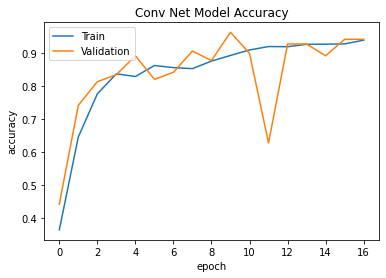

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt

# summarize history for accuracy --- SAVE
plt.plot(hs.history['accuracy'])
plt.plot(hs.history['val_accuracy'])
plt.title('Conv Net Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig("Conv Net Model Accuracy")
plt.show()


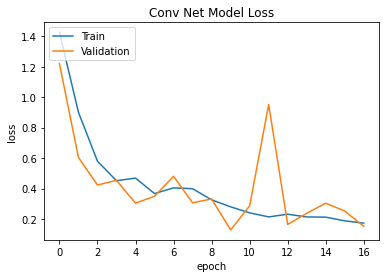

In [31]:
# summarize history for loss --- SAVE
plt.plot(hs.history['loss'])
plt.plot(hs.history['val_loss'])
plt.title('Conv Net Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig("ConvNet_Loss.png")
plt.show()


# Testing

In [30]:
#  Loading Best Model
from tensorflow.keras.models import load_model
model = load_model("/content/best_ConvNet.h5")
test_data,test_step = ScaleImages(test_path)

# Accuracy
acc = model.evaluate_generator(test_data)[1]

print(acc)

# Loss
los = model.evaluate_generator(test_data)[0]

print(los)

Found 466 images belonging to 4 classes.
0.9120171666145325
0.2309454083442688


In [ ]:
test_data,test_step = ScaleImages(test_path)

filenames = test_data.filenames
nb_samples = len(filenames)



Found 466 images belonging to 4 classes.


In [ ]:
predict = model.predict_generator(test_data,
                                  steps = test_step)
# steps =  np.ceil(nb_samples/32)

In [ ]:
test_step

14

In [ ]:
loss = model.evaluate(test_data)[0]
loss

47/47 [==============================] - 1s 21ms/step - loss: 0.2519 - accuracy: 0.8970


0.2519344091415405

In [ ]:
# Accuracy
acc = model.evaluate(test_data)[1]
print(acc)

47/47 [==============================] - 1s 22ms/step - loss: 0.2519 - accuracy: 0.8970
0.8969957232475281


In [ ]:
# predict

array([[8.35934937e-01, 1.50305003e-01, 1.34812677e-02, 2.78768537e-04],
       [9.98931348e-01, 7.29828316e-04, 3.38699523e-04, 2.91981532e-08],
       [2.37173006e-01, 7.43152380e-01, 1.96685009e-02, 6.13219345e-06],
       [9.87065971e-01, 9.32790060e-03, 3.60457296e-03, 1.59983608e-06],
       [4.15883183e-01, 5.82315981e-01, 1.80089148e-03, 8.05124245e-10],
       [8.29227030e-01, 1.19539775e-01, 2.81179231e-02, 2.31152847e-02],
       [9.17543650e-01, 7.07065240e-02, 1.17432801e-02, 6.55933582e-06],
       [4.13163036e-01, 5.75811028e-01, 5.56847919e-03, 5.45743015e-03],
       [4.56880987e-01, 5.25435150e-01, 1.76645368e-02, 1.92918142e-05],
       [7.29463637e-01, 2.30905727e-01, 3.95082869e-02, 1.22303682e-04],
       [7.35249043e-01, 1.73857808e-01, 8.99230391e-02, 9.70019319e-04],
       [1.87976375e-01, 5.00668306e-03, 8.07016969e-01, 3.52859018e-12],
       [7.91492581e-01, 1.18204646e-01, 8.97883773e-02, 5.14429936e-04],
       [5.11257887e-01, 4.09565091e-01, 7.89558887e

In [ ]:
# # Random Check
# path = "/content/test/Early/WBC-Malignant-Early-028.jpg"

# from keras.preprocessing.image import load_img, img_to_array
# img = load_img(path, target_size=(224,224))
# input_arr = img_to_array(img)/255
# # input_arr = preprocess_input(input_arr)/255
# input_arr = np.array([input_arr])
# print(input_arr.shape) #------------------

# pred = np.argmax(model.predict(input_arr))
# print(pred) #------------------------
# # input_arr = np.expand_dims(input_arr, axis=0)

# # To display the image
# plt.imshow(input_arr[0])
# plt.title("Input image")
# plt.show()

In [ ]:
# #ImageDataGenerator for reading data from directory
# test_generator = ImageDataGenerator(rescale=1/255).flow_from_directory(test_path,
#     target_size=(224, 224),
#     shuffle = "false",
#     batch_size=val_step,
#     class_mode='categorical')

# #Predicting the classes of images
# predictions = model.predict_generator(test_generator)

# getting the labels
pred_labels = list(np.argmax(predict, axis=-1))

# getting true labels
true_labels = test_data.classes

# # get the confusion plot
# import sklearn
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(true_labels, pred_labels)
# cm

TypeError: ignored

In [ ]:
pred_labels = np.argmax(predict, axis=-1)


In [ ]:
len(true_labels)

466

In [ ]:
len(pred_labels)

150

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(true_labels,pred_labels)
print(report)

ValueError: ignored

In [ ]:
# image_directory = "/content/test"

# Benign = os.listdir(image_directory+ "/Benign/")

# Early = os.listdir(image_directory+ "/Early/")

# Pre = os.listdir(image_directory+ "/Pre/")

# Pro = os.listdir(image_directory+ "/Pro/")

# print(len(Benign), len(Early), len(Pre), len(Pro))



In [ ]:
# #  /content/Original/Benign/WBC-Benign-001.jpg
# from PIL import Image
# dataset = []
# label = []
# size = 224
# # Benign
# for i, image_name in enumerate(Benign): # Here i = iteration number, image_name = name of the image
# # print(image_directory+"/Benign/"+image_name)
#   if image_name.split('.')[1] == "jpg":
#     image = cv2.imread(image_directory+"/Benign/"+image_name)
#     # print(image)
#     image = Image.fromarray(image, "RGB")
#     image = image.resize((size,size))
#     dataset.append(np.array(image))
#     label.append(0)

# # Early
# for i, image_name in enumerate(Early): # Here i = iteration number, image_name = name of the image
# # print(image_directory+"/Early/"+image_name)
#   if image_name.split('.')[1] == "jpg":
#     image = cv2.imread(image_directory+"/Early/"+image_name)
#     # print(image)
#     image = Image.fromarray(image, "RGB")
#     image = image.resize((size,size))
#     dataset.append(np.array(image))
#     label.append(1)

# # Pre
# for i, image_name in enumerate(Pre): # Here i = iteration number, image_name = name of the image
# # print(image_directory+"/Pre/"+image_name)
#   if image_name.split('.')[1] == "jpg":
#     image = cv2.imread(image_directory+"/Pre/"+image_name)
#     # print(image)
#     image = Image.fromarray(image, "RGB")
#     image = image.resize((size,size))
#     dataset.append(np.array(image))
#     label.append(2)

# # Pro
# for i, image_name in enumerate(Pro): # Here i = iteration number, image_name = name of the image
# # print(image_directory+"/Pro/"+image_name)
#   if image_name.split('.')[1] == "jpg":
#     image = cv2.imread(image_directory+"/Pro/"+image_name)
#     # print(image)
#     image = Image.fromarray(image, "RGB")
#     image = image.resize((size,size))
#     dataset.append(np.array(image))
#     label.append(3)


In [ ]:
# print(len(dataset))
# print(len(label))

In [ ]:
# # def ScaleImages(path):
# #   """
# #   Input: path
# #   Output: Generated Data
# #   """
# #   image_data = ImageDataGenerator(rescale=1/255)
# #   image = image_data.flow_from_directory(directory=path, target_size=(224,224), batch_size = 32, class_mode= "categorical")
# #   val_step = image.n//32
# #   return image,val_step

# # val_data,val_step = ScaleImages(val_path)
# # test_data,test_step = ScaleImages(test_path)


# image_data = ImageDataGenerator()
# image = image_data.flow_from_directory(directory="/content/test", 
#                                        target_size=(224,224), 
#                                        batch_size = 32, 
#                                        class_mode= "categorical", 
#                                        shuffle  =False)
# print(image[0])


In [ ]:
# x = ImageDataGenerator()
# XX = np.array(dataset)
# image = x.flow(XX, shuffle=False)

In [ ]:
image[0]

In [ ]:
# from tensorflow.keras.utils import normalize, to_categorical
# xtrain = normalize(dataset)
# xtrain[0]
